In [1]:
import numpy as np

import torch.nn as nn
import torch.optim as optim
from lr_scheduler import CyclicCosineDecayLR

import matplotlib.pyplot as plt

import warnings
# pytorch warns when scheduler.step() is called before optimizer.step()
# ignore warnings in this notebook
warnings.filterwarnings('ignore')

In [2]:
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        self.fc = nn.Linear(10,5)
    def forward(self, x):
        return self.fc(x)

In [3]:
def visualize_learning_rate(scheduler, epochs):
    lrs = [[] for _ in range(len(scheduler.optimizer.param_groups))]
    for epoch in range(epochs):
        for lst, dct in zip(lrs, scheduler.optimizer.param_groups):
            lst.append(dct['lr'])
#         lrs.append(scheduler.optimizer.param_groups[0]["lr"])
        scheduler.step()

    lists = []
    for l in lrs:
        lists.append(list(range(epochs)))
        lists.append(l)
    plt.figure(figsize=(12,4))
    lines = plt.plot(*lists)
    plt.setp(lines[0], linewidth=3)
    plt.title('Learning rate change')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.xticks(np.arange(0, epochs + 1, 10), rotation=45)
    # plt.yticks(np.arange(0.01, 0.11, 0.01))
    plt.grid(True)
    plt.show()

In [4]:
model = TestNet()

### Fixed cycle intervals

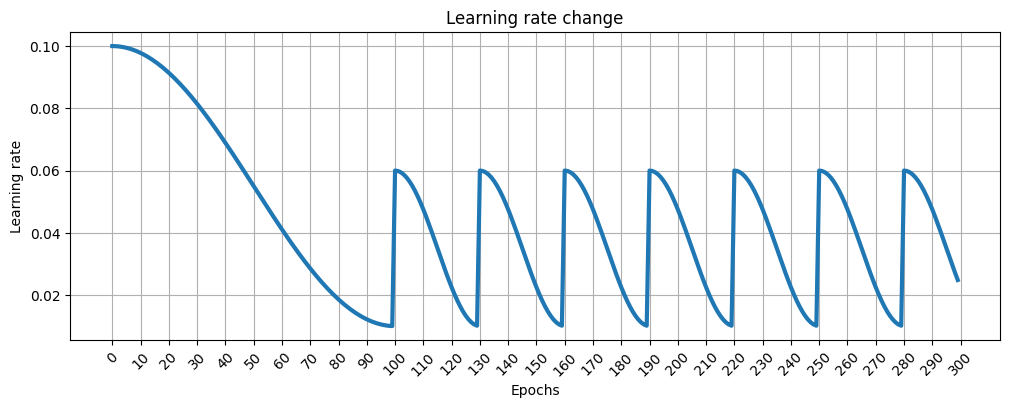

In [5]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1,
                                restart_interval = 30,
                                restart_lr_multiplier=0.6)

visualize_learning_rate(scheduler, epochs=300)

### Geometrically increasing cycle intervals

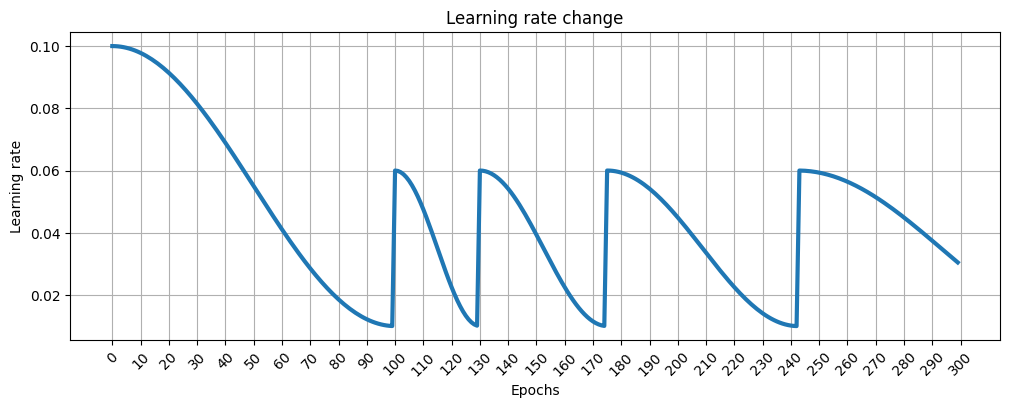

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1,
                                restart_interval=30,
                                restart_interval_multiplier=1.5,
                                restart_lr_multiplier=0.6)

visualize_learning_rate(scheduler, epochs=300)

if `restart_lr` is omitted, learning rate is set to `lr` on each restart

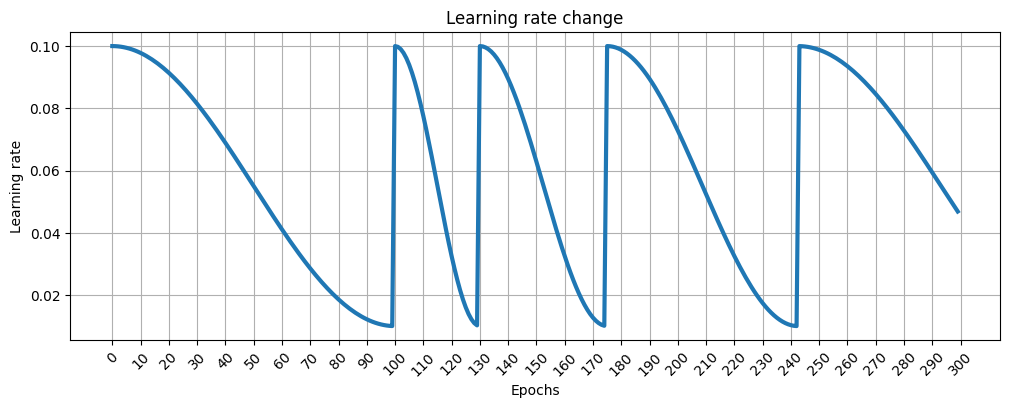

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1,
                                restart_interval=30,
                                restart_interval_multiplier=1.5)

visualize_learning_rate(scheduler, epochs=300)

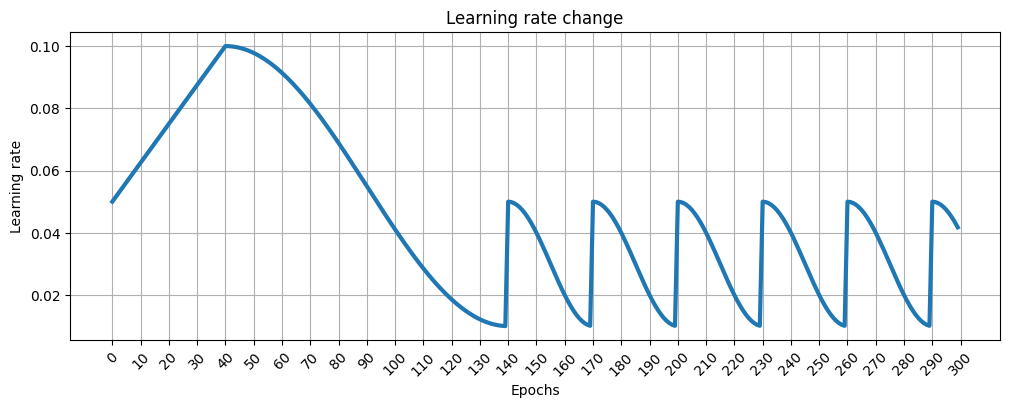

In [8]:
# with warmup
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1,
                                restart_interval = 30,
                                restart_lr_multiplier=0.5,
                                warmup_epochs=40,
                                warmup_start_lr_multiplier=0.5)

visualize_learning_rate(scheduler, epochs=300)

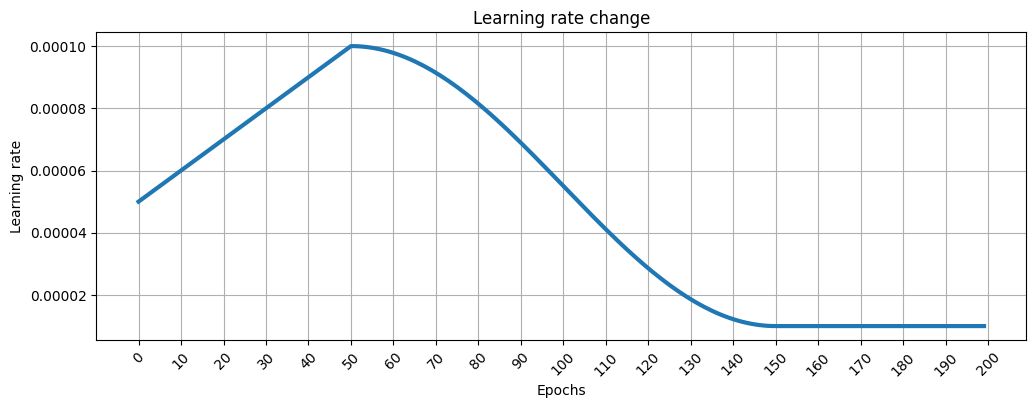

In [9]:
# warmup with cosine decay
optimizer = optim.SGD(model.parameters(), lr=1e-4)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1,
                                warmup_epochs=50,
                                warmup_start_lr_multiplier=0.5)

visualize_learning_rate(scheduler, epochs=200)

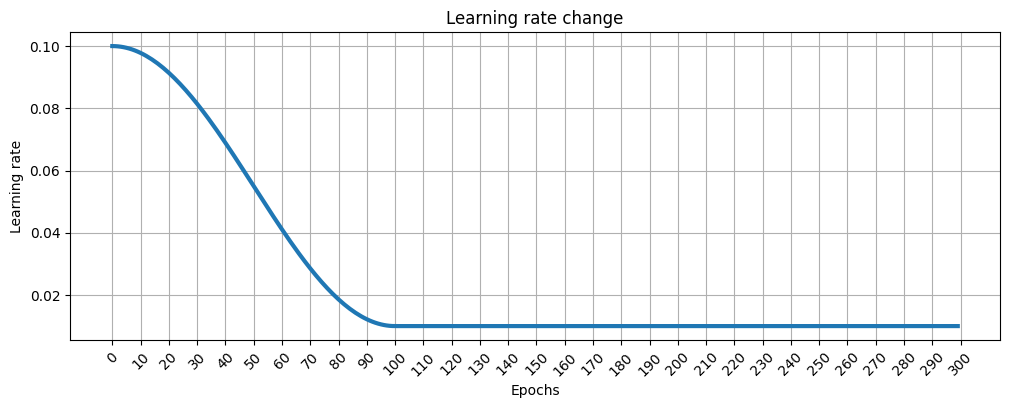

In [10]:
# no warmup, no cycles
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=0.1)

visualize_learning_rate(scheduler, epochs=300)

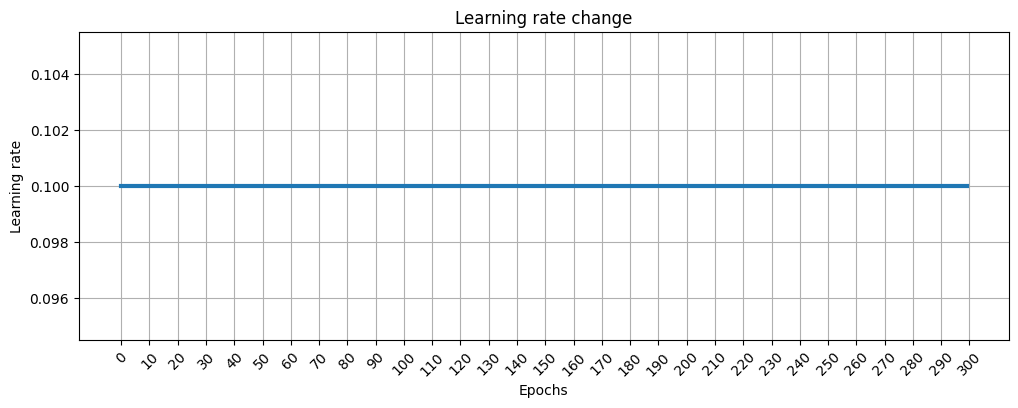

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = CyclicCosineDecayLR(optimizer,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=1.0)

visualize_learning_rate(scheduler, epochs=300)

### Multiple parameter groups

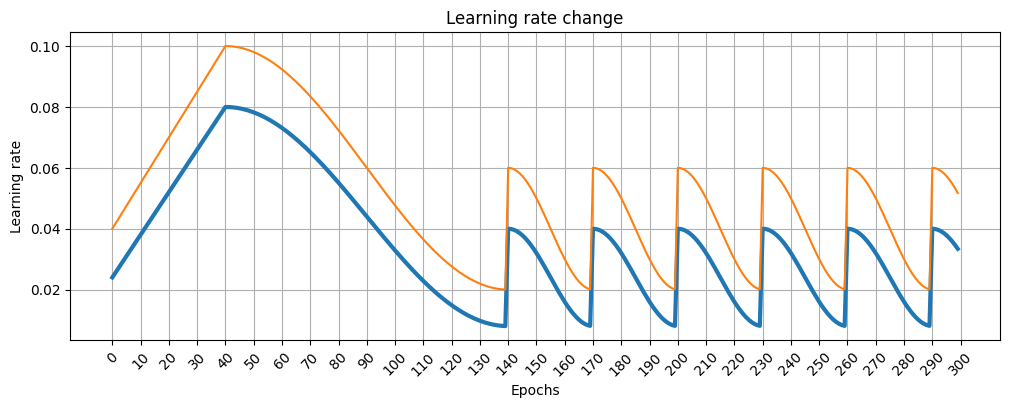

In [12]:
model2 = TestNet()
optimizer_mul = optim.SGD([
    {'params': model.parameters(), 'lr': 0.08},
    {'params': model2.parameters(), 'lr': 0.1}
])

scheduler = CyclicCosineDecayLR(optimizer_mul,
                                init_decay_epochs=100,
                                min_decay_lr_multiplier=[0.1, 0.2],
                                restart_interval = 30,
                                restart_lr_multiplier=[0.5, 0.6],
                                warmup_epochs=40,
                                warmup_start_lr_multiplier=[0.3, 0.4])

visualize_learning_rate(scheduler, epochs=300)
